# Konten

* [Pengenalan]
* [Tahap 1 Pra_Pemrosesan]
    * [1.1 Kesimpulan dan langkah-langkah selanjutnya]
* [Tahap 2 Mengisi dan Menghapus Data yang Hilang]
    * [2.1 Kolom `model_year`]
    * [2.2 Kolom `cylinders`]
    * [2.3 Kolom `odometer`]
    * [2.4 Kolom `paint_color`]
    * [2.5 Kolom `is_4wd`]
* [Tahap 3 Mengubah Tipe Data]
    * [3.1 Kolom `model_year`]
    * [3.2 Kolom `cylinders`]
    * [3.3 Kolom `is_4wd`]
    * [3.4 Kolom `date_posted`]
    * [3.5 Kolom `model`]
* [Tahap 4 Memperbaiki Kualitas Data]
    * [4.1 Menambahkan Usia Pada Mobil]
    * [4.2 Jarak Tempuh Rata-rata Kendaraan Pertahun]
    * [4.3 Mengganti Nilai Pada Kolom `condition`]
* [Tahap 5 Memeriksa Data yang Sudah Bersih]
* [Tahap 6 Mempelajari Parameter Inti]
* [Tahap 7 Mempelajari dan Menangani Outlier]
* [Tahap 8 Mempelajari Parameter Inti Tanpa Outlier]
* [Tahap 9 Harga Rata-Rata Setiap Jenis Kendaraan]
* [Tahap 10 Faktor Harga]
* [Tahap 11 Kesimpulan Umum]



## Pengenalan
Tujuan projek: Mengetahui faktor-faktor apa saja yang memengaruhi harga sebuah mobil.
Hipotesis:
1. Harga sebuah mobil dipengaruhi oleh usia mobil.
2. Harga sebuah mobil dipengaruhi oleh jarak tempuh mobil.
3. Harga sebuah mobil dipengaruhi oleh kondisi mobil.
4. Harga sebuah mobil dipengaruhi tipe transmisi.

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

In [111]:
try:
    df = pd.read_csv('D:\datasets\moved_vehicles_us.csv')
except:
    df = pd.read_csv('/datasets/moved_vehicle_us.csv')

## Pra-pemrosesan

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [113]:
df.shape

(51525, 13)

In [114]:
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [115]:
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


## Kesimpulan dan Langkah-langkah Selanjutnya
**Dari informasi di atas, dapat disimpulkan bahwa:**
- Dataset kita berjumlah **51525** baris dan **13** kolom.
- Terdapat missing values di kolom `model_year`, `cylinders`, `odometer`, `paint_color`, dan `is_4wd`.
- Nilai yang hilang tidak menunjukkan pola atau jarang yang ada di baris yang sama. Kehilangan nilai ini cukup random.
- Nilai yang hilang akan diganti atau di-drop tergantung apakah nilai itu berpengaruh pada analisis kedepannya atau tidak.
- Ada beberapa kolom yang memiliki tipe data yang tidak sesuai diantaranya: `model_year`, `cylinders`, dan `date_posted`. 
- Dari semua kolom tersebut, `date_posted` memiliki tipe data yang apabila tidak diubah, maka akan memengaruhi analisis kita kedepannya. Karena tipe datanya adalah `datetime` bukan `object`.
- Ada jenis mobil yang dirilis dengan tahun yang jauh berbeda.

**Berdasarkan kesimpulan di atas, maka kita akan melakukan langkah-langkah sebagai berikut:**
- Mengecek terlebih dahulu presentasi data yang hilang di setiap kolom. Hal ini dilakukan untuk memutuskan apakah data akan dihapus atau diganti nilainya.
- Mengisi/menghapus nilai yang hilang.
- Mengganti tipe data yang tidak sesuai pada kolom. Khususnya pada kolom `date_posted`, karena kita akan menggunakan kolom tersbut untuk analisis nanti.

In [116]:
percentage_of_model_year = df['model_year'].isnull().sum()/len(df) * 100
percentage_of_cylinders = df['cylinders'].isnull().sum()/len(df) * 100
percentage_of_odometer = df['odometer'].isnull().sum()/len(df) * 100
percentage_of_paint_color = df['paint_color'].isnull().sum()/len(df) * 100
percentage_of_is_4wd = df['is_4wd'].isnull().sum()/len(df) * 100

In [117]:
print(f'Presentasi data yang hilang pada kolom model_year adalah: {percentage_of_model_year}')
print(f'Presentasi data yang hilang pada kolom cylinders adalah: {percentage_of_cylinders}')
print(f'Presentasi data yang hilang pada kolom odometer adalah: {percentage_of_odometer}') 
print(f'Presentasi data yang hilang pada kolom paint_color adalah: {percentage_of_paint_color}')
print(f'Presentasi data yang hilang pada kolom is_4wd adalah: {percentage_of_is_4wd}')

Presentasi data yang hilang pada kolom model_year adalah: 7.023774866569626
Presentasi data yang hilang pada kolom cylinders adalah: 10.208636584182436
Presentasi data yang hilang pada kolom odometer adalah: 15.316836487142163
Presentasi data yang hilang pada kolom paint_color adalah: 17.985443959243085
Presentasi data yang hilang pada kolom is_4wd adalah: 50.36972343522562


Karena presentasi data yang hilang lebih dari **5%** semua, maka data yang hilang diputuskan untuk diganti dan tidak dihapus. Kecuali untuk kolom `model_year` karena kita tidak tahu tahun berapa yang akan diisi berdasarkan model mobilnya, maka nilai hilang pada kolom `model_year` akan dihapus.

## Mengisi/Menghapus Data yang Hilang

### Kolom `model_year`

In [118]:
df = df.dropna(subset=['model_year']).reset_index(drop=True)

In [119]:
df.isnull().sum()

price               0
model_year          0
model               0
condition           0
cylinders        4897
fuel                0
odometer         7343
transmission        0
type                0
paint_color      8615
is_4wd          24142
date_posted         0
days_listed         0
dtype: int64

Nilai hilang pada kolom `model_year` dihapus karena nilai yang hilang pada kolom tersebut paling kecil dan tidak berpengaruh untuk analisis.

### Kolom `cylinders`

In [120]:
df['cylinders'].unique()

array([ 6.,  4.,  8., nan,  5., 10.,  3., 12.])

Berdasarkan website yang kita cari, Mobil biasanya bermesin 3,4,5,6,8,10,12,16 silinder. Untuk mobil penumpang, mesin dengan 3, 4, 6 silinder lebih umum. Jadi, untuk nilai yang hilang pada kolom ini, kemungkinan nilainya adalah 16. Karena sesuai urutan silinder-nya.

In [121]:
df['cylinders']= df['cylinders'].fillna(16)

In [122]:
df['cylinders'].isnull().sum()

0

### Kolom `odometer`

In [123]:
mean_test= df.pivot_table(index='condition', values='odometer', aggfunc='mean')

In [124]:
mean_test

,odometer
condition,
excellent,106531.608281
fair,183291.311024
good,129891.604531
like new,79075.041287
new,41297.939130
salvage,141070.068966


In [125]:
def get_mean(mean_odometer):
    return mean_test['odometer'][mean_odometer]

In [126]:
get_mean('fair')

183291.31102362205

In [127]:
df['mean_odometer']= df['condition'].apply(get_mean)

In [128]:
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,mean_odometer
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,129891.604531
1,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,79075.041287
2,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,183291.311024
3,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,106531.608281
4,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,106531.608281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47901,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37,79075.041287
47902,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22,141070.068966
47903,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32,106531.608281
47904,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71,129891.604531


In [129]:
df['odometer']= df['odometer'].fillna(df['mean_odometer'])

In [130]:
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,mean_odometer
0,9400,2011.0,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,NaN,1.0,2018-06-23,19,129891.604531
1,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,NaN,2019-02-07,79,79075.041287
2,1500,2003.0,ford f-150,fair,8.0,gas,183291.311024,automatic,pickup,NaN,NaN,2019-03-22,9,183291.311024
3,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,NaN,2019-04-02,28,106531.608281
4,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.000000,automatic,sedan,black,1.0,2018-06-20,15,106531.608281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47901,9249,2013.0,nissan maxima,like new,6.0,gas,88136.000000,automatic,sedan,black,NaN,2018-10-03,37,79075.041287
47902,2700,2002.0,honda civic,salvage,4.0,gas,181500.000000,automatic,sedan,white,NaN,2018-11-14,22,141070.068966
47903,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.000000,automatic,sedan,blue,NaN,2018-11-15,32,106531.608281
47904,7455,2013.0,toyota corolla,good,4.0,gas,139573.000000,automatic,sedan,black,NaN,2018-07-02,71,129891.604531


Nilai yang hilang pada kolom `odometer` diganti dengan nilai rata-rata odometer berdasarkan kondisi mobil. Hal ini dilakukan karena seberapa jauh jarak odometer, mencerminkan kondisi mobil. Sehingga kita memilih nilai rata-rata untuk mengisi nilai yang hilang.

### Kolom `paint_color`

In [131]:
df['paint_color'].unique()

array([nan, 'red', 'black', 'white', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

In [132]:
df.query('paint_color=="red"')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,mean_odometer
1,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,NaN,2019-02-07,79,79075.041287
14,17990,2013.0,ram 1500,excellent,8.0,gas,106531.608281,automatic,pickup,red,1.0,2018-05-15,111,106531.608281
15,14990,2010.0,ram 1500,excellent,8.0,gas,130725.000000,automatic,pickup,red,1.0,2018-12-30,13,106531.608281
16,13990,2014.0,jeep cherokee,excellent,6.0,gas,100669.000000,automatic,SUV,red,1.0,2018-08-16,25,106531.608281
18,13990,2018.0,hyundai elantra,excellent,4.0,gas,31932.000000,automatic,sedan,red,NaN,2018-08-25,27,106531.608281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47831,3200,2003.0,ford f350 super duty,good,10.0,gas,200000.000000,automatic,truck,red,1.0,2019-03-01,73,129891.604531
47840,14500,2001.0,gmc sierra,excellent,8.0,gas,65000.000000,automatic,truck,red,NaN,2018-09-07,39,106531.608281
47847,11000,2003.0,ford f-250,good,8.0,diesel,129891.604531,automatic,pickup,red,1.0,2018-11-15,18,129891.604531
47874,10950,2016.0,ford fusion se,excellent,4.0,gas,36000.000000,automatic,sedan,red,NaN,2019-03-27,71,106531.608281


Warna pada kolom `paint_color` begitu banyak. Tidak mungkin mengisi dengan salah satu warna yang ada. Dan kita tidak bisa melihat pola yang membuat nilai pada kolom `paint_color` menghilang. Namun, kita bisa mengisi nilai yang hilang tersebut dengan satu nilai yaitu **custom**. Nilai yang bisa disesuaikan.

In [133]:
df['paint_color']= df['paint_color'].fillna('custom')

In [134]:
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,mean_odometer
0,9400,2011.0,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,custom,1.0,2018-06-23,19,129891.604531
1,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,NaN,2019-02-07,79,79075.041287
2,1500,2003.0,ford f-150,fair,8.0,gas,183291.311024,automatic,pickup,custom,NaN,2019-03-22,9,183291.311024
3,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,NaN,2019-04-02,28,106531.608281
4,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.000000,automatic,sedan,black,1.0,2018-06-20,15,106531.608281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47901,9249,2013.0,nissan maxima,like new,6.0,gas,88136.000000,automatic,sedan,black,NaN,2018-10-03,37,79075.041287
47902,2700,2002.0,honda civic,salvage,4.0,gas,181500.000000,automatic,sedan,white,NaN,2018-11-14,22,141070.068966
47903,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.000000,automatic,sedan,blue,NaN,2018-11-15,32,106531.608281
47904,7455,2013.0,toyota corolla,good,4.0,gas,139573.000000,automatic,sedan,black,NaN,2018-07-02,71,129891.604531


### Kolom `is_4wd`

In [135]:
df['is_4wd'].unique()

array([ 1., nan])

Pada kolom `is_4wd` terdapat nilai 1 dan nan, yang seharusnya nilai pada kolom tersebut harus diisi dengan 2 nilai boolean yaitu 0 dan 1. nilai 0 menandakan kalau tipe mobil tersebut tidak memiliki 4 roda penggerak dan 1 menandakan kalau tipe mobil tersebut memiliki 4 roda penggerak. Maka dari itu, nilai hilang tersebut akan diisi dengan 0. 

Hal ini bisa terjadi mungkin karena ada beberapa mobil yang tidak memiliki 4 roda penggerak maka untuk nilai-nya tidak diisi dan dibiarkan kosong.

In [136]:
df['is_4wd']= df['is_4wd'].fillna(0)

In [137]:
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,mean_odometer
0,9400,2011.0,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,custom,1.0,2018-06-23,19,129891.604531
1,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,0.0,2019-02-07,79,79075.041287
2,1500,2003.0,ford f-150,fair,8.0,gas,183291.311024,automatic,pickup,custom,0.0,2019-03-22,9,183291.311024
3,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,0.0,2019-04-02,28,106531.608281
4,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.000000,automatic,sedan,black,1.0,2018-06-20,15,106531.608281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47901,9249,2013.0,nissan maxima,like new,6.0,gas,88136.000000,automatic,sedan,black,0.0,2018-10-03,37,79075.041287
47902,2700,2002.0,honda civic,salvage,4.0,gas,181500.000000,automatic,sedan,white,0.0,2018-11-14,22,141070.068966
47903,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.000000,automatic,sedan,blue,0.0,2018-11-15,32,106531.608281
47904,7455,2013.0,toyota corolla,good,4.0,gas,139573.000000,automatic,sedan,black,0.0,2018-07-02,71,129891.604531


In [138]:
df.isnull().sum()

price            0
model_year       0
model            0
condition        0
cylinders        0
fuel             0
odometer         0
transmission     0
type             0
paint_color      0
is_4wd           0
date_posted      0
days_listed      0
mean_odometer    0
dtype: int64

Sudah tidak ada lagi nilai yang hilang. Selanjutnya adalah memperbaiki tipe data.

## Memperbaiki Tipe Data

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47906 entries, 0 to 47905
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          47906 non-null  int64  
 1   model_year     47906 non-null  float64
 2   model          47906 non-null  object 
 3   condition      47906 non-null  object 
 4   cylinders      47906 non-null  float64
 5   fuel           47906 non-null  object 
 6   odometer       47906 non-null  float64
 7   transmission   47906 non-null  object 
 8   type           47906 non-null  object 
 9   paint_color    47906 non-null  object 
 10  is_4wd         47906 non-null  float64
 11  date_posted    47906 non-null  object 
 12  days_listed    47906 non-null  int64  
 13  mean_odometer  47906 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 5.1+ MB


Ada beberapa tipe data yang tidak sesuai dengan nilainya. Namun, yang paling krusial adalah tipe data pada kolom `date_posted` yang akan kita gunakan untuk analisis kita.

### Kolom `model_year`
Mengubah tipe data pada kolom `model_year` dari float64 menjadi integer.

In [140]:
df['model_year'] = df['model_year'].astype('int64')

In [141]:
df['model_year']

0        2011
1        2013
2        2003
3        2017
4        2014
         ... 
47901    2013
47902    2002
47903    2009
47904    2013
47905    2014
Name: model_year, Length: 47906, dtype: int64

### Kolom `cylinders`

In [142]:
df['cylinders'] = df['cylinders'].astype('int64')

In [143]:
df['cylinders']

0        6
1        4
2        8
3        4
4        6
        ..
47901    6
47902    4
47903    4
47904    4
47905    4
Name: cylinders, Length: 47906, dtype: int64

### Kolom `is_4wd`

In [144]:
df['is_4wd'] = df['is_4wd'].astype('int64')

In [145]:
df['is_4wd']

0        1
1        0
2        0
3        0
4        1
        ..
47901    0
47902    0
47903    0
47904    0
47905    0
Name: is_4wd, Length: 47906, dtype: int64

### Kolom `date_posted`

In [146]:
df['date_posted']= pd.to_datetime(df['date_posted'], format='%Y-%m-%dT%H:%M')

In [147]:
df['date_posted']

0       2018-06-23
1       2019-02-07
2       2019-03-22
3       2019-04-02
4       2018-06-20
           ...    
47901   2018-10-03
47902   2018-11-14
47903   2018-11-15
47904   2018-07-02
47905   2018-06-05
Name: date_posted, Length: 47906, dtype: datetime64[ns]

### Kolom `model`

In [148]:
df['model'].sort_values().unique()

array(['acura tl', 'bmw x5', 'buick enclave', 'cadillac escalade',
       'chevrolet camaro', 'chevrolet camaro lt coupe 2d',
       'chevrolet colorado', 'chevrolet corvette', 'chevrolet cruze',
       'chevrolet equinox', 'chevrolet impala', 'chevrolet malibu',
       'chevrolet silverado', 'chevrolet silverado 1500',
       'chevrolet silverado 1500 crew', 'chevrolet silverado 2500hd',
       'chevrolet silverado 3500hd', 'chevrolet suburban',
       'chevrolet tahoe', 'chevrolet trailblazer', 'chevrolet traverse',
       'chrysler 200', 'chrysler 300', 'chrysler town & country',
       'dodge charger', 'dodge dakota', 'dodge grand caravan',
       'ford econoline', 'ford edge', 'ford escape', 'ford expedition',
       'ford explorer', 'ford f-150', 'ford f-250', 'ford f-250 sd',
       'ford f-250 super duty', 'ford f-350 sd', 'ford f150',
       'ford f150 supercrew cab xlt', 'ford f250', 'ford f250 super duty',
       'ford f350', 'ford f350 super duty', 'ford focus', 'ford focus

In [149]:
df['model']=df['model'].replace(['ford f150', 'ford f150 supercrew cab xlt', 'ford f250', 'ford f250 super duty', 'ford f350', 'ford f350 super duty'], ['ford f-150', 'ford f-150 supercrew cab xlt', 'ford f-250', 'ford f-250 super duty', 'ford f-350', 'ford f-350 super duty'])

In [150]:
df['model'].sort_values().unique()

array(['acura tl', 'bmw x5', 'buick enclave', 'cadillac escalade',
       'chevrolet camaro', 'chevrolet camaro lt coupe 2d',
       'chevrolet colorado', 'chevrolet corvette', 'chevrolet cruze',
       'chevrolet equinox', 'chevrolet impala', 'chevrolet malibu',
       'chevrolet silverado', 'chevrolet silverado 1500',
       'chevrolet silverado 1500 crew', 'chevrolet silverado 2500hd',
       'chevrolet silverado 3500hd', 'chevrolet suburban',
       'chevrolet tahoe', 'chevrolet trailblazer', 'chevrolet traverse',
       'chrysler 200', 'chrysler 300', 'chrysler town & country',
       'dodge charger', 'dodge dakota', 'dodge grand caravan',
       'ford econoline', 'ford edge', 'ford escape', 'ford expedition',
       'ford explorer', 'ford f-150', 'ford f-150 supercrew cab xlt',
       'ford f-250', 'ford f-250 sd', 'ford f-250 super duty',
       'ford f-350', 'ford f-350 sd', 'ford f-350 super duty',
       'ford focus', 'ford focus se', 'ford fusion', 'ford fusion se',
       '

Terdapat nilai yang berbeda namun memiliki makna sama pada model atau jenis mobil. Hal ini mungkin bisa terjadi karena kesalahan ketik pada saat memasukkan nilai. Maka dari itu kita mengganti nilainya dengan nilai yang benar sesuai jenis mobilnya.

## Memperbaiki Kualitas Data

### Menambahkan Waktu Pada Iklan

In [151]:
year=df['date_posted'].dt.strftime("%Y")
year=year.astype('int64')
df['day_posted']= df['date_posted'].dt.weekday
df['month_posted']= df['date_posted'].dt.month
df['year_posted']= year

In [152]:
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,mean_odometer,day_posted,month_posted,year_posted
0,9400,2011,bmw x5,good,6,gas,145000.000000,automatic,SUV,custom,1,2018-06-23,19,129891.604531,5,6,2018
1,5500,2013,hyundai sonata,like new,4,gas,110000.000000,automatic,sedan,red,0,2019-02-07,79,79075.041287,3,2,2019
2,1500,2003,ford f-150,fair,8,gas,183291.311024,automatic,pickup,custom,0,2019-03-22,9,183291.311024,4,3,2019
3,14900,2017,chrysler 200,excellent,4,gas,80903.000000,automatic,sedan,black,0,2019-04-02,28,106531.608281,1,4,2019
4,14990,2014,chrysler 300,excellent,6,gas,57954.000000,automatic,sedan,black,1,2018-06-20,15,106531.608281,2,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47901,9249,2013,nissan maxima,like new,6,gas,88136.000000,automatic,sedan,black,0,2018-10-03,37,79075.041287,2,10,2018
47902,2700,2002,honda civic,salvage,4,gas,181500.000000,automatic,sedan,white,0,2018-11-14,22,141070.068966,2,11,2018
47903,3950,2009,hyundai sonata,excellent,4,gas,128000.000000,automatic,sedan,blue,0,2018-11-15,32,106531.608281,3,11,2018
47904,7455,2013,toyota corolla,good,4,gas,139573.000000,automatic,sedan,black,0,2018-07-02,71,129891.604531,0,7,2018


### Menambahkan Usia Pada Mobil

In [153]:
df['car_age']=year-df['model_year']

In [154]:
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,mean_odometer,day_posted,month_posted,year_posted,car_age
0,9400,2011,bmw x5,good,6,gas,145000.000000,automatic,SUV,custom,1,2018-06-23,19,129891.604531,5,6,2018,7
1,5500,2013,hyundai sonata,like new,4,gas,110000.000000,automatic,sedan,red,0,2019-02-07,79,79075.041287,3,2,2019,6
2,1500,2003,ford f-150,fair,8,gas,183291.311024,automatic,pickup,custom,0,2019-03-22,9,183291.311024,4,3,2019,16
3,14900,2017,chrysler 200,excellent,4,gas,80903.000000,automatic,sedan,black,0,2019-04-02,28,106531.608281,1,4,2019,2
4,14990,2014,chrysler 300,excellent,6,gas,57954.000000,automatic,sedan,black,1,2018-06-20,15,106531.608281,2,6,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47901,9249,2013,nissan maxima,like new,6,gas,88136.000000,automatic,sedan,black,0,2018-10-03,37,79075.041287,2,10,2018,5
47902,2700,2002,honda civic,salvage,4,gas,181500.000000,automatic,sedan,white,0,2018-11-14,22,141070.068966,2,11,2018,16
47903,3950,2009,hyundai sonata,excellent,4,gas,128000.000000,automatic,sedan,blue,0,2018-11-15,32,106531.608281,3,11,2018,9
47904,7455,2013,toyota corolla,good,4,gas,139573.000000,automatic,sedan,black,0,2018-07-02,71,129891.604531,0,7,2018,5


### Jarak Tempuh Rata-rata Kendaraan Pertahun

In [155]:
mean_odometer_per_year= df.pivot_table(index='model_year', values='odometer')

In [156]:
mean_odometer_per_year

,odometer
model_year,
1908,137929.804141
1929,129891.604531
1936,30000.000000
1948,4000.000000
1949,1800.000000
...,...
2015,86657.923691
2016,68518.272782
2017,56828.396087


In [157]:
def mean_per_year(year):
    return mean_odometer_per_year['odometer'][year]

In [158]:
df['odometer_per_year']= df['model_year'].apply(mean_per_year)

In [159]:
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,mean_odometer,day_posted,month_posted,year_posted,car_age,odometer_per_year
0,9400,2011,bmw x5,good,6,gas,145000.000000,automatic,SUV,custom,1,2018-06-23,19,129891.604531,5,6,2018,7,123536.482216
1,5500,2013,hyundai sonata,like new,4,gas,110000.000000,automatic,sedan,red,0,2019-02-07,79,79075.041287,3,2,2019,6,105087.948765
2,1500,2003,ford f-150,fair,8,gas,183291.311024,automatic,pickup,custom,0,2019-03-22,9,183291.311024,4,3,2019,16,156384.719260
3,14900,2017,chrysler 200,excellent,4,gas,80903.000000,automatic,sedan,black,0,2019-04-02,28,106531.608281,1,4,2019,2,56828.396087
4,14990,2014,chrysler 300,excellent,6,gas,57954.000000,automatic,sedan,black,1,2018-06-20,15,106531.608281,2,6,2018,4,96598.166004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47901,9249,2013,nissan maxima,like new,6,gas,88136.000000,automatic,sedan,black,0,2018-10-03,37,79075.041287,2,10,2018,5,105087.948765
47902,2700,2002,honda civic,salvage,4,gas,181500.000000,automatic,sedan,white,0,2018-11-14,22,141070.068966,2,11,2018,16,152938.032806
47903,3950,2009,hyundai sonata,excellent,4,gas,128000.000000,automatic,sedan,blue,0,2018-11-15,32,106531.608281,3,11,2018,9,129863.891914
47904,7455,2013,toyota corolla,good,4,gas,139573.000000,automatic,sedan,black,0,2018-07-02,71,129891.604531,0,7,2018,5,105087.948765


### Mengganti Nilai Pada Kolom `condition`

In [160]:
df['condition'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

Pada kolom `condition` akan diubah menjadi kolom yang berisi nilai kategorikal dari 1 sampai 6.
- 0 adalah salvage
- 1 adalah fair
- 2 adalah good
- 3 adalah excellent
- 4 adalah like new
- 5 adalah new

Perubahan pada nilai kolom ini dilakukan supaya kita bisa menganilisis kolom menggunakan histogram. Apakah terjadi loncatan jauh atau oulier.

In [161]:
condition=['salvage', 'fair', 'good', 'excellent', 'like new', 'new']
condition_value=[0, 1, 2, 3, 4, 5]
df['condition']= df['condition'].replace(condition, condition_value)

In [162]:
df['condition'].unique()

array([2, 4, 1, 3, 0, 5], dtype=int64)

## Memeriksa Data yang Sudah Bersih

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47906 entries, 0 to 47905
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              47906 non-null  int64         
 1   model_year         47906 non-null  int64         
 2   model              47906 non-null  object        
 3   condition          47906 non-null  int64         
 4   cylinders          47906 non-null  int64         
 5   fuel               47906 non-null  object        
 6   odometer           47906 non-null  float64       
 7   transmission       47906 non-null  object        
 8   type               47906 non-null  object        
 9   paint_color        47906 non-null  object        
 10  is_4wd             47906 non-null  int64         
 11  date_posted        47906 non-null  datetime64[ns]
 12  days_listed        47906 non-null  int64         
 13  mean_odometer      47906 non-null  float64       
 14  day_po

In [164]:
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,mean_odometer,day_posted,month_posted,year_posted,car_age,odometer_per_year
0,9400,2011,bmw x5,2,6,gas,145000.000000,automatic,SUV,custom,1,2018-06-23,19,129891.604531,5,6,2018,7,123536.482216
1,5500,2013,hyundai sonata,4,4,gas,110000.000000,automatic,sedan,red,0,2019-02-07,79,79075.041287,3,2,2019,6,105087.948765
2,1500,2003,ford f-150,1,8,gas,183291.311024,automatic,pickup,custom,0,2019-03-22,9,183291.311024,4,3,2019,16,156384.719260
3,14900,2017,chrysler 200,3,4,gas,80903.000000,automatic,sedan,black,0,2019-04-02,28,106531.608281,1,4,2019,2,56828.396087
4,14990,2014,chrysler 300,3,6,gas,57954.000000,automatic,sedan,black,1,2018-06-20,15,106531.608281,2,6,2018,4,96598.166004
5,12990,2015,toyota camry,3,4,gas,79212.000000,automatic,sedan,white,0,2018-12-27,73,106531.608281,3,12,2018,3,86657.923691
6,15990,2013,honda pilot,3,6,gas,109473.000000,automatic,SUV,black,1,2019-01-07,68,106531.608281,0,1,2019,6,105087.948765
7,11500,2012,kia sorento,3,4,gas,104174.000000,automatic,SUV,custom,1,2018-07-16,19,106531.608281,0,7,2018,6,112623.384664
8,9200,2008,honda pilot,3,16,gas,147191.000000,automatic,SUV,blue,1,2019-02-15,17,106531.608281,4,2,2019,11,137860.592529
9,19500,2011,chevrolet silverado 1500,3,8,gas,128413.000000,automatic,pickup,black,1,2018-09-17,38,106531.608281,0,9,2018,7,123536.482216


## Mempelajari Parameter Inti

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

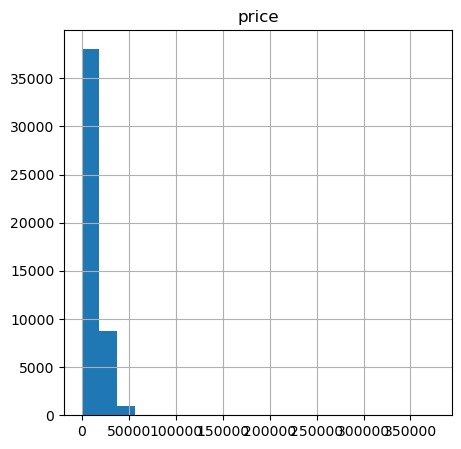

In [165]:
df.hist('price', bins=20, figsize=(5, 5))

array([[<AxesSubplot:title={'center':'car_age'}>]], dtype=object)

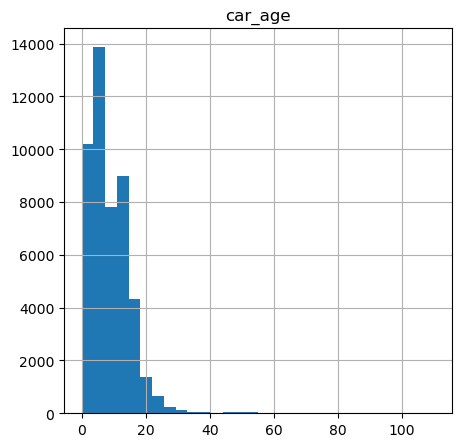

In [166]:
df.hist('car_age', bins=30, figsize=(5, 5))

array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

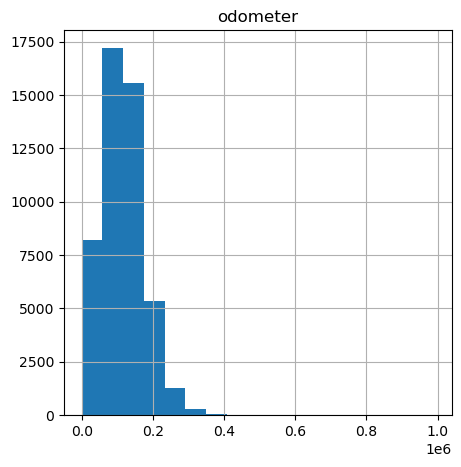

In [167]:
df.hist('odometer', bins=17, figsize=(5, 5))

array([[<AxesSubplot:title={'center':'cylinders'}>]], dtype=object)

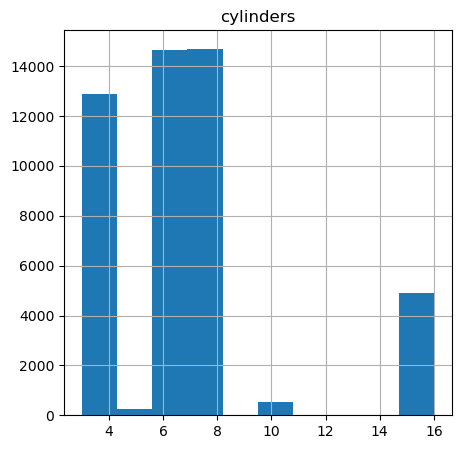

In [168]:
df.hist('cylinders', bins=10, figsize=(5, 5))

array([[<AxesSubplot:title={'center':'condition'}>]], dtype=object)

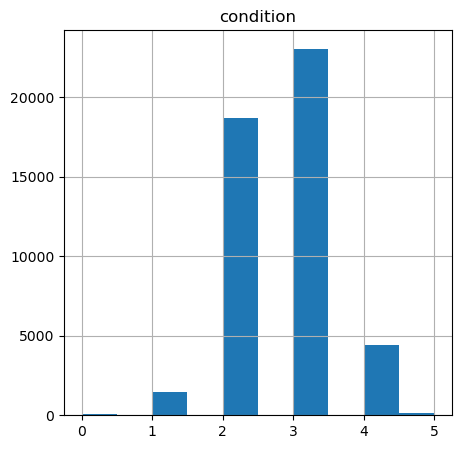

In [169]:
df.hist('condition', bins=10, figsize=(5, 5))

Berdasarkan histogram di atas, kita punya kesimpulan sementara:
- Untuk kolom `price` terdapat nilai harga yang jauh atau bisa dibilang sangat jomplang kalau dibandingkan dengan harga lain. Contohnya harga 1, 3, dan 5 yang mana sangat tidak masuk akal kalau ada mobil dengan harga 1, 3, dan 5.
- Untuk kolom `car_age` sebenarnya tidak terlalu banyak masalah ya. Karena banyak mobil dengan usia yang normal. Namun, ada beberapa usia mobil yang sangat jauh dari usia normalnya. Contohnya ada mobil dengan usia lebih dari 1 abad.
- Untuk kolom `odometer` tidak ada nilai yang mengandung outlie. kalau dilihat ada nilai 0, hal ini mungkin bisa terjadi dari kondisi mobil yang habis diperbaiki atau odometernya bisa saja direset.
- Untuk kolom `condition` tidak terdapat outlier karena ini berdasarkan kondisi mobil jadi tidak ada nilai-nilai yang esktrim.

Mungkin dengan kita membuat histogram, kita bisa tahu bahwa histogram tersebut mengisyaratkan adanya oulier. Tetapi, kita tidak bisa mengatakan dengan pasti kalau itu adalah outlier.

## Mempelajar Parameter Inti Tanpa Outlier

Dalam kasus ini kita akan mengambil dua kolom untuk difilter dalam menghilangkan outliernya. Yaitu kolom `price` dan juga kolom `car_age`. Untuk menentukan batas bawah dan batas atas kita menggunakan kolom `price`.

In [170]:
Q1= df['price'].quantile(0.25)
Q3= df['price'].quantile(0.75)
IQR= Q3-Q1

In [171]:
batas_atas= Q3+(1.5*IQR)
batas_bawah= Q1-(1.5*IQR)

34750.0

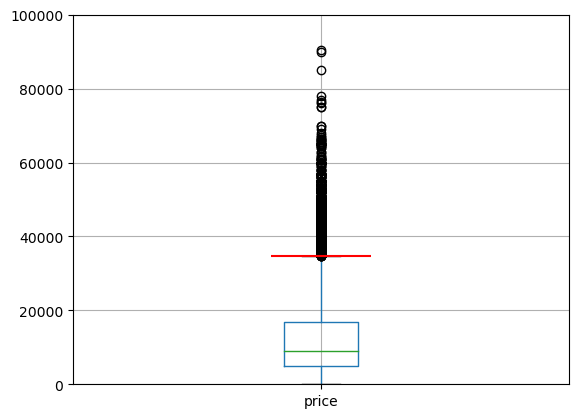

In [172]:
plt.ylim(0, 100000)
df.boxplot(column=['price'])
plt.hlines(y=batas_atas, xmin=0.9, xmax=1.1, color='red')
batas_atas

-12850.0

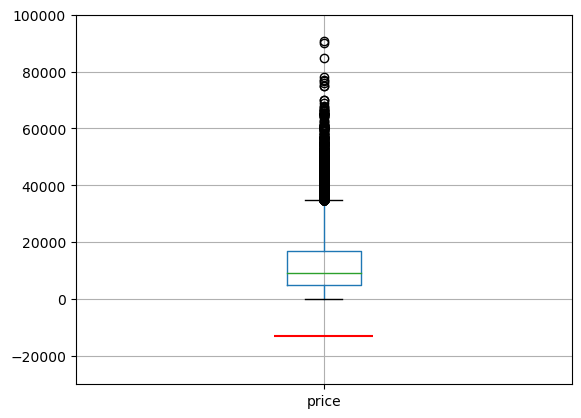

In [173]:
plt.ylim(-30000, 100000)
df.boxplot(column=['price'])
plt.hlines(y=batas_bawah, xmin=0.9, xmax=1.1, color='red')
batas_bawah

In [174]:
Q1_car= df['car_age'].quantile(0.25)
Q3_car= df['car_age'].quantile(0.75)
IQR_car= Q3_car-Q1_car

In [175]:
batas_atas_car= Q3_car+(1.5*IQR_car)
batas_bawah_car= Q1_car-(1.5*IQR_car)

24.0

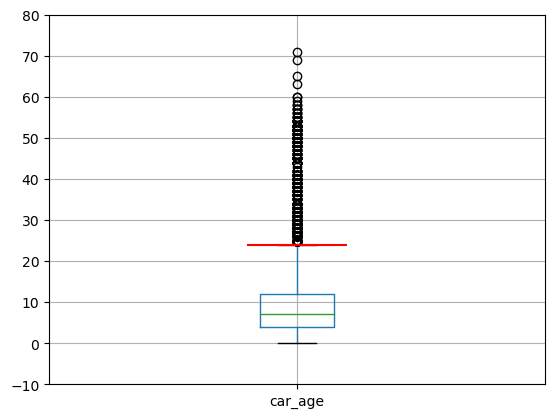

In [176]:
plt.ylim(-10, 80)
df.boxplot(column=['car_age'])
plt.hlines(y=batas_atas_car, xmin=0.9, xmax=1.1, color='red')
batas_atas_car

-8.0

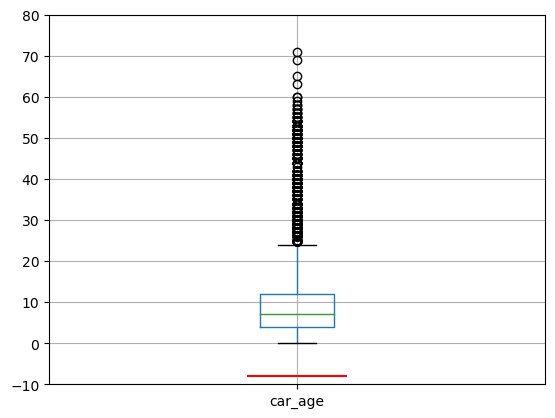

In [177]:
plt.ylim(-10, 80)
df.boxplot(column=['car_age'])
plt.hlines(y=batas_bawah_car, xmin=0.9, xmax=1.1, color='red')
batas_bawah_car

Dari boxplot tersebut, kita bisa filter data sesuai boxplot yang dibuat. Untuk pemfilterannya, pada kolom `price` kita hanya akan mengambil data mobil yang memiliki harga dari **1.000**. Saya rasa ini harga wajar kalau dilihat dari berapa lama mobil itu dan model mobil tersebut. Untuk kolom `car_age`, kita akan mengambil mobil yang usianya maksimal adalah **24 tahun** sesuai dengan hasil oulier yang ditunjukkan oleh boxplot.

In [178]:
df_without_outlier= df.query('1000<=price<=34750 & car_age<=24').reset_index(drop=True)

In [179]:
df_without_outlier

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,mean_odometer,day_posted,month_posted,year_posted,car_age,odometer_per_year
0,9400,2011,bmw x5,2,6,gas,145000.000000,automatic,SUV,custom,1,2018-06-23,19,129891.604531,5,6,2018,7,123536.482216
1,5500,2013,hyundai sonata,4,4,gas,110000.000000,automatic,sedan,red,0,2019-02-07,79,79075.041287,3,2,2019,6,105087.948765
2,1500,2003,ford f-150,1,8,gas,183291.311024,automatic,pickup,custom,0,2019-03-22,9,183291.311024,4,3,2019,16,156384.719260
3,14900,2017,chrysler 200,3,4,gas,80903.000000,automatic,sedan,black,0,2019-04-02,28,106531.608281,1,4,2019,2,56828.396087
4,14990,2014,chrysler 300,3,6,gas,57954.000000,automatic,sedan,black,1,2018-06-20,15,106531.608281,2,6,2018,4,96598.166004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44368,9249,2013,nissan maxima,4,6,gas,88136.000000,automatic,sedan,black,0,2018-10-03,37,79075.041287,2,10,2018,5,105087.948765
44369,2700,2002,honda civic,0,4,gas,181500.000000,automatic,sedan,white,0,2018-11-14,22,141070.068966,2,11,2018,16,152938.032806
44370,3950,2009,hyundai sonata,3,4,gas,128000.000000,automatic,sedan,blue,0,2018-11-15,32,106531.608281,3,11,2018,9,129863.891914
44371,7455,2013,toyota corolla,2,4,gas,139573.000000,automatic,sedan,black,0,2018-07-02,71,129891.604531,0,7,2018,5,105087.948765


array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

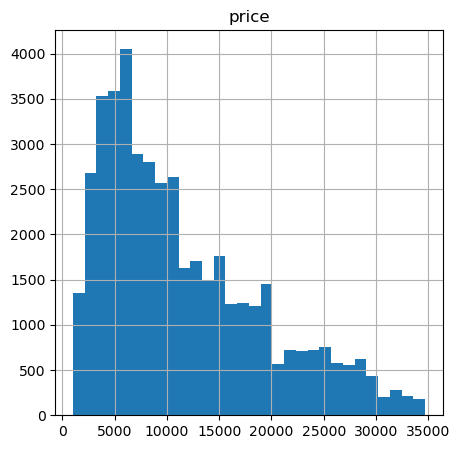

In [180]:
df_without_outlier.hist('price', bins=30, figsize=(5, 5))

array([[<AxesSubplot:title={'center':'car_age'}>]], dtype=object)

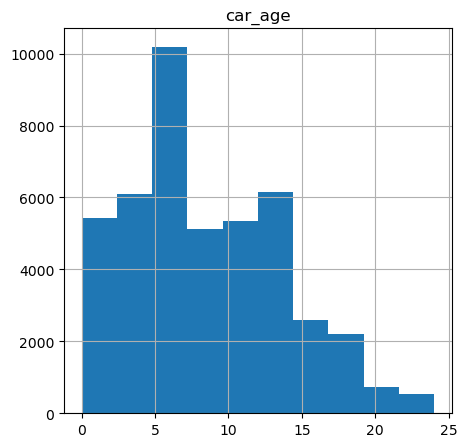

In [181]:
df_without_outlier.hist('car_age', bins=10, figsize=(5, 5))

**Kesimpulan**
- Untuk data yang masih berisi outlier: Pada data tersebut (kolom `price` dan `car_age`) masih memiliki nilai ekstrim yang mana itu akan mempengaruhi hasil akhir kesimpulan. Contohnya pada kolom `price` kita lebih banyak memiliki harga mobil yang sekitaran 1000 dan sedikit yang memiliki harga di atas 34000. Hal ini akan sulit untuk menentukan nilai median. Begitu pun sama dengan pada kolom `car_age`.
- Untuk data yang tidak ada outlier: Pada data yang sudah difilter (kolom `price` dan `car_age`) sudah memiliki grafik histogram yang bagus dan tidak ada nilai ekstrim di sana.

<AxesSubplot:>

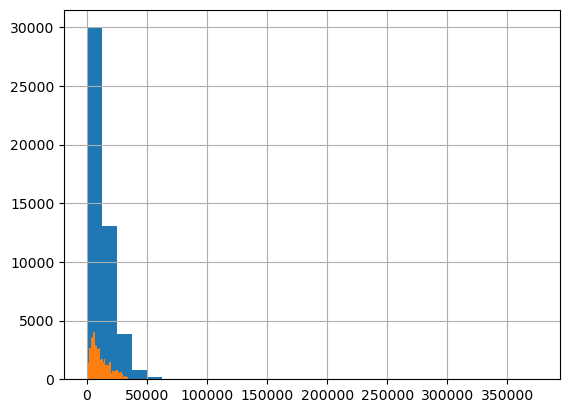

In [182]:
df['price'].hist(bins=30)
df_without_outlier['price'].hist(bins=30)

<AxesSubplot:>

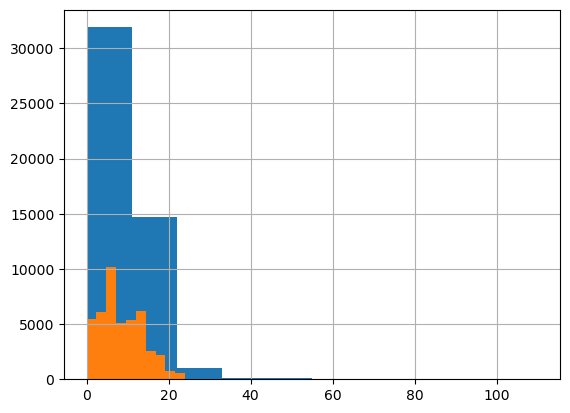

In [183]:
df['car_age'].hist(bins=10)
df_without_outlier['car_age'].hist(bins=10)

Bisa dilihat perbedaannya untuk data yang blm dan sesudah difilter. Pada kolom `price` terdapat outlier sehingga nilai yang ditunjukkan adalah nilai yang memiliki nilai yang lebih rendah dari rata-rata mobil pada umumnya.

Untuk kolom `car_age` terdapat outlier yaitu pada umur mobil yang lebih dari 1 abad. Sehingga membuat grafiknya hanya memunculkan nilai kebanyakan mobil yang masih berumur muda.

## Masa Berlaku Iklan

In [184]:
model_days_list= df_without_outlier.pivot_table(index='model',values='days_listed', aggfunc=['mean', 'median'])

In [185]:
model_days_list

,mean,median
,days_listed,days_listed
model,,
acura tl,39.605381,34.0
bmw x5,41.946281,34.0
buick enclave,39.023438,33.0
cadillac escalade,41.334630,34.0
chevrolet camaro,38.033445,31.0
...,...,...
toyota sienna,39.915825,34.0
toyota tacoma,38.860372,33.0


In [186]:
condition_days_list= df_without_outlier.pivot_table(index='condition', values='days_listed', aggfunc=['mean', 'median'])

In [187]:
condition_days_list

,mean,median
,days_listed,days_listed
condition,,
0,41.082192,36
1,38.878168,32
2,39.613367,33
3,39.651046,33
4,39.199485,33
5,36.531646,36


In [188]:
price_days_list= df_without_outlier.pivot_table(index='price',values='days_listed', aggfunc=['mean', 'median'])

In [189]:
price_days_list.tail(10)

,mean,median
,days_listed,days_listed
price,,
34500,31.551724,27.0
34545,23.000000,23.0
34555,20.000000,20.0
34595,26.000000,26.0
34599,64.000000,64.0
34600,57.200000,34.0
34689,23.000000,23.0
34690,19.500000,19.5


Berdasarkan eksplorasi di atas, umumnya suatu iklan ditayangkan adalah satu bulan atau satu bulan lebih. Suatu iklan lebih baik ditayangkan lebih lama ketika ada model dengan kondisi yang bagus. Sedangkan untuk model yang memiliki harga yang mahal dengan kondisi yang biasa aja lebih baik ditayangkan dengan cepat. Karena orang-orang tidak begitu tertarik dengan mobil yang memiliki harga yang mahal dan juga keluaran lama.

## Harga Rata-rata Setiap Jenis Kendaraan

In [190]:
mean_model_stat= df_without_outlier.pivot_table(index='model', values='price')

In [191]:
mean_model_stat

,price
model,
acura tl,6473.865471
bmw x5,10432.966942
buick enclave,11507.535156
cadillac escalade,12873.420233
chevrolet camaro,13349.946488
...,...
toyota sienna,8788.101010
toyota tacoma,15114.021277
toyota tundra,14679.240481


In [192]:
count_add= df_without_outlier.pivot_table(index='model', values='date_posted', aggfunc='count')
count_add

,date_posted
model,
acura tl,223
bmw x5,242
buick enclave,256
cadillac escalade,257
chevrolet camaro,299
...,...
toyota sienna,297
toyota tacoma,752
toyota tundra,499


In [193]:
add_and_price= mean_model_stat.join(count_add)

<AxesSubplot:xlabel='model'>

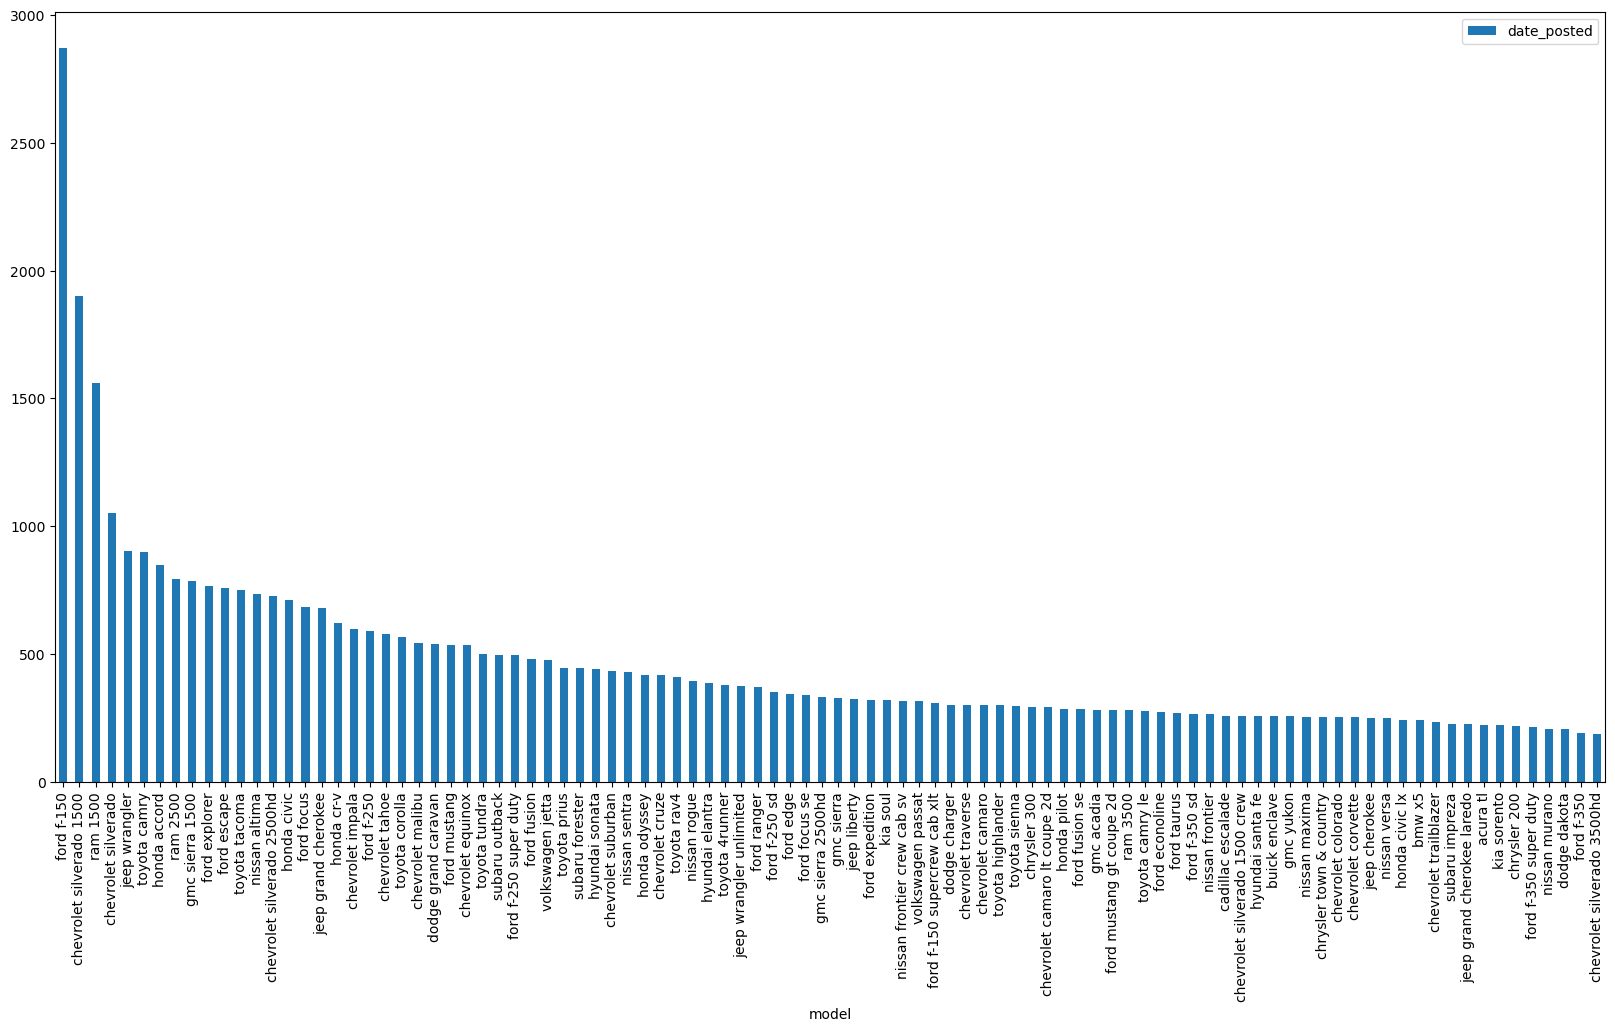

In [194]:
add_and_price.sort_values(by='date_posted', ascending=False).plot(y='date_posted', kind='bar' ,figsize=(20,10))

In [195]:
add_and_price['price']['ford f-150']

13434.818403624957

In [196]:
add_and_price['price']['chevrolet silverado 1500']

15063.26224328594

In [197]:
add_and_price['date_posted']['ford f-150']

2869

In [198]:
add_and_price['date_posted']['chevrolet silverado 1500']

1899

Untuk dua kendaraan yang memiliki jumlah iklan terbanyak adalah ford f-150 dan chevrolet silverado 1500 dengan jumlah iklan sebanyak 2869 dan 1899. Hal ini bisa terjadi karena model mobil yaitu truck dan pick up yang mana banyak dibutuhkan untuk pekerja dibandingkan mobil untuk berkendera biasa. Harganya juga tergolong murah kalau dibandingkan dengan tipe yang serupa.

## Faktor Harga

In [199]:
factor_price = df_without_outlier[['price', 'model_year', 'model', 'condition', 'odometer', 'transmission', 'paint_color', 'car_age']]

In [200]:
factor_price.query('model=="ford f-150" & paint_color=="silver"')

,price,model_year,model,condition,odometer,transmission,paint_color,car_age
175,10000,2006,ford f-150,3,181000.000000,automatic,silver,12
181,19900,2013,ford f-150,3,79657.000000,automatic,silver,5
242,19900,2013,ford f-150,3,79657.000000,automatic,silver,6
537,18000,2013,ford f-150,3,92431.000000,automatic,silver,5
702,27925,2015,ford f-150,3,18326.000000,automatic,silver,3
...,...,...,...,...,...,...,...,...
43282,18995,2015,ford f-150,2,126023.000000,automatic,silver,3
43411,11995,2011,ford f-150,3,127960.000000,automatic,silver,7
43614,16500,2012,ford f-150,3,106531.608281,automatic,silver,6
44018,30000,2016,ford f-150,3,72418.000000,automatic,silver,2


In [201]:
factor_price.query('model=="chevrolet silverado 1500" & paint_color=="silver"')

,price,model_year,model,condition,odometer,transmission,paint_color,car_age
127,13995,2010,chevrolet silverado 1500,3,151442.000000,automatic,silver,8
218,5700,2002,chevrolet silverado 1500,2,105000.000000,automatic,silver,16
274,24900,2016,chevrolet silverado 1500,3,32000.000000,automatic,silver,3
514,13990,2009,chevrolet silverado 1500,2,129891.604531,automatic,silver,9
1153,18900,2015,chevrolet silverado 1500,2,85193.000000,automatic,silver,3
...,...,...,...,...,...,...,...,...
42930,17500,2010,chevrolet silverado 1500,2,129891.604531,automatic,silver,8
43756,6950,2005,chevrolet silverado 1500,2,108000.000000,automatic,silver,13
43992,27704,2018,chevrolet silverado 1500,3,17000.000000,automatic,silver,0
44043,31990,2018,chevrolet silverado 1500,3,10892.000000,automatic,silver,0


In [202]:
factor_price.query('model=="ford f-150" & transmission=="manual"')

,price,model_year,model,condition,odometer,transmission,paint_color,car_age
487,3995,2000,ford f-150,2,142000.0,manual,red,18
722,2995,1999,ford f-150,2,0.0,manual,custom,20
1189,2850,1997,ford f-150,2,255040.0,manual,custom,21
1624,4000,2001,ford f-150,2,160000.0,manual,white,17
1906,2800,2003,ford f-150,2,99000.0,manual,white,15
...,...,...,...,...,...,...,...,...
41598,2500,1998,ford f-150,2,265000.0,manual,black,20
41695,3195,1999,ford f-150,2,200000.0,manual,red,19
42412,3500,2003,ford f-150,2,100415.0,manual,grey,15
42644,1995,1995,ford f-150,2,148946.0,manual,red,23


In [203]:
factor_price.query('model=="chevrolet silverado 1500" & transmission=="automatic"')

,price,model_year,model,condition,odometer,transmission,paint_color,car_age
9,19500,2011,chevrolet silverado 1500,3,128413.000000,automatic,black,7
58,16999,2013,chevrolet silverado 1500,2,137230.000000,automatic,white,5
111,21595,2015,chevrolet silverado 1500,3,92634.000000,automatic,black,3
127,13995,2010,chevrolet silverado 1500,3,151442.000000,automatic,silver,8
131,28250,2017,chevrolet silverado 1500,3,13808.000000,automatic,white,1
...,...,...,...,...,...,...,...,...
44210,29990,2016,chevrolet silverado 1500,3,106531.608281,automatic,silver,2
44272,21897,2015,chevrolet silverado 1500,3,153911.000000,automatic,red,4
44299,6995,2005,chevrolet silverado 1500,3,170633.000000,automatic,black,13
44308,5495,2003,chevrolet silverado 1500,3,106531.608281,automatic,custom,16


Berdasarkan paparan data di atas yang diambil dari 2 mobil dengan pemasangan iklan terbanyak, bisa ditarik beberapa kesimpulan apa faktor harga yang paling berpengaruh:
1. Berdasarkan tahun keluarnya suatu model. Semakin tua model yang keluar, maka harganya akan murah meskipun kondisinya itu bagus.
2. Harga mobil akan semakin mahal, ketika model tersebut baru keluar atu 2-3 tahun lalu keluar dan kondisinya masih bagus.
3. Jarak tempuh di sini mungkin tidak terlalu berpengaruh ya, karena meskipun jarak tempuhnya masih kecil tapi karena kondisinya sudah jelek dan tahun modelnya sudah lama maka itu tidak bisa membuat harga mobil menjadi mahal.
4. Transmisi yang mahal adalah transmisi automatic karena transmisi manual sudah ketinggalan jaman.
5. Warna mobil yang memiliki harga tinggi adalah warna silver. Kebanyakan mobil dengan warna tersebut adalah model yang keluaran belum lama dan kondisinya masih bagus.

Karena kolom `transmission` dan `paint_color` masih berupa kata, maka akan diubah dulu menjadi kolom kategorik berisi angka.

In [204]:
paint_color_dict = {j:i for i, j in enumerate(sorted(df_without_outlier['paint_color'].unique()))}
paint_color_dict

{'black': 0,
 'blue': 1,
 'brown': 2,
 'custom': 3,
 'green': 4,
 'grey': 5,
 'orange': 6,
 'purple': 7,
 'red': 8,
 'silver': 9,
 'white': 10,
 'yellow': 11}

In [205]:
transmission_dict = {j:i for i, j in enumerate(sorted(df_without_outlier['transmission'].unique()))}
transmission_dict

{'automatic': 0, 'manual': 1, 'other': 2}

In [206]:
df_without_outlier['color_id']= df_without_outlier['paint_color'].map(paint_color_dict)
df_without_outlier['transmission_id']= df_without_outlier['transmission'].map(transmission_dict)

In [207]:
df_without_outlier

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,date_posted,days_listed,mean_odometer,day_posted,month_posted,year_posted,car_age,odometer_per_year,color_id,transmission_id
0,9400,2011,bmw x5,2,6,gas,145000.000000,automatic,SUV,custom,...,2018-06-23,19,129891.604531,5,6,2018,7,123536.482216,3,0
1,5500,2013,hyundai sonata,4,4,gas,110000.000000,automatic,sedan,red,...,2019-02-07,79,79075.041287,3,2,2019,6,105087.948765,8,0
2,1500,2003,ford f-150,1,8,gas,183291.311024,automatic,pickup,custom,...,2019-03-22,9,183291.311024,4,3,2019,16,156384.719260,3,0
3,14900,2017,chrysler 200,3,4,gas,80903.000000,automatic,sedan,black,...,2019-04-02,28,106531.608281,1,4,2019,2,56828.396087,0,0
4,14990,2014,chrysler 300,3,6,gas,57954.000000,automatic,sedan,black,...,2018-06-20,15,106531.608281,2,6,2018,4,96598.166004,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44368,9249,2013,nissan maxima,4,6,gas,88136.000000,automatic,sedan,black,...,2018-10-03,37,79075.041287,2,10,2018,5,105087.948765,0,0
44369,2700,2002,honda civic,0,4,gas,181500.000000,automatic,sedan,white,...,2018-11-14,22,141070.068966,2,11,2018,16,152938.032806,10,0
44370,3950,2009,hyundai sonata,3,4,gas,128000.000000,automatic,sedan,blue,...,2018-11-15,32,106531.608281,3,11,2018,9,129863.891914,1,0
44371,7455,2013,toyota corolla,2,4,gas,139573.000000,automatic,sedan,black,...,2018-07-02,71,129891.604531,0,7,2018,5,105087.948765,0,0


In [208]:
factor_price_new = df_without_outlier[['price', 'model_year', 'model', 'condition', 'odometer', 'transmission_id', 'color_id', 'car_age']]

In [209]:
factor_price_new

,price,model_year,model,condition,odometer,transmission_id,color_id,car_age
0,9400,2011,bmw x5,2,145000.000000,0,3,7
1,5500,2013,hyundai sonata,4,110000.000000,0,8,6
2,1500,2003,ford f-150,1,183291.311024,0,3,16
3,14900,2017,chrysler 200,3,80903.000000,0,0,2
4,14990,2014,chrysler 300,3,57954.000000,0,0,4
...,...,...,...,...,...,...,...,...
44368,9249,2013,nissan maxima,4,88136.000000,0,0,5
44369,2700,2002,honda civic,0,181500.000000,0,10,16
44370,3950,2009,hyundai sonata,3,128000.000000,0,1,9
44371,7455,2013,toyota corolla,2,139573.000000,0,0,5


In [210]:
top_car=factor_price_new.query('model==["ford f-150","chevrolet silverado 1500"]')

<AxesSubplot:>

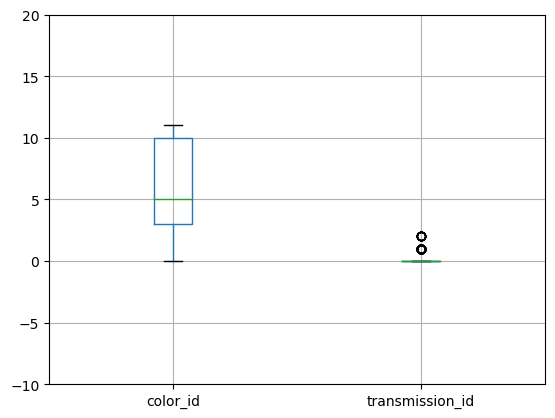

In [211]:
plt.ylim(-10, 20)
top_car.boxplot(column=['color_id', 'transmission_id'])

Tidak terdapat oulier pada kolom color_id dan hanya sedikit adanya outlier pada kolom transmission. Namun, itu bukanlah masalah mengingat memang ada jenis mobil yang memiliki transmission yang berbeda-beda.

In [212]:
top_car.corr()

,price,model_year,condition,odometer,transmission_id,color_id,car_age
price,1.000000,0.813773,0.407026,-0.621100,-0.102650,-0.071501,-0.811742
model_year,0.813773,1.000000,0.368606,-0.512352,-0.157884,0.009715,-0.996124
condition,0.407026,0.368606,1.000000,-0.375505,-0.070433,-0.023468,-0.367663
odometer,-0.621100,-0.512352,-0.375505,1.000000,0.054049,0.060068,0.511122
transmission_id,-0.102650,-0.157884,-0.070433,0.054049,1.000000,-0.000616,0.156866
color_id,-0.071501,0.009715,-0.023468,0.060068,-0.000616,1.000000,-0.009376
car_age,-0.811742,-0.996124,-0.367663,0.511122,0.156866,-0.009376,1.000000


array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='model_year', ylabel='price'>,
        <AxesSubplot:xlabel='condition', ylabel='price'>,
        <AxesSubplot:xlabel='odometer', ylabel='price'>,
        <AxesSubplot:xlabel='transmission_id', ylabel='price'>,
        <AxesSubplot:xlabel='color_id', ylabel='price'>,
        <AxesSubplot:xlabel='car_age', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='model_year'>,
        <AxesSubplot:xlabel='model_year', ylabel='model_year'>,
        <AxesSubplot:xlabel='condition', ylabel='model_year'>,
        <AxesSubplot:xlabel='odometer', ylabel='model_year'>,
        <AxesSubplot:xlabel='transmission_id', ylabel='model_year'>,
        <AxesSubplot:xlabel='color_id', ylabel='model_year'>,
        <AxesSubplot:xlabel='car_age', ylabel='model_year'>],
       [<AxesSubplot:xlabel='price', ylabel='condition'>,
        <AxesSubplot:xlabel='model_year', ylabel='condition'>,
        <AxesSubplot:xlabel='con

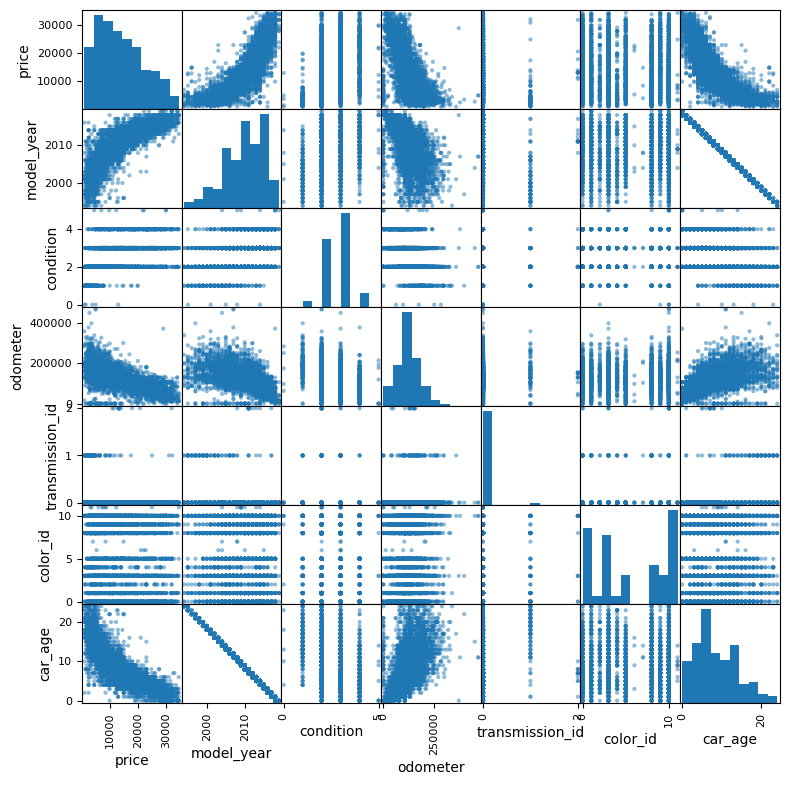

In [213]:
pd.plotting.scatter_matrix(top_car, figsize=(9, 9)) 

Beberapa kolom memiliki korelasi yang bagus kecuali pada kolom `color_id` dan juga kolom `transmission_id` yang mana nilai korelasi yang dihasilkan itu cukup rendah hampir mendekati 0 jika kita bandingkan dengan kolom yang lain.

Ini artinya, untuk warna dan jenis transmisi itu memang tidak memilliki hubungan baik yang membuat suatu harga mobill itu bisa mahal dan bisa murah.

## Kesimpulan Umum

Analisis dimulai dengan kita membuat hipotesis, yaitu:
1. Harga sebuah mobil dipengaruhi oleh usia mobil.
2. Harga sebuah mobil dipengaruhi oleh jarak tempuh mobil.
3. Harga sebuah mobil dipengaruhi oleh kondisi mobil.
4. Harga sebuah mobil dipengaruhi tipe transmisi.

Pertama yang harus dilakukan sebelum analisis adalah pra-pemrosessan data. Jadi, kita mencari nilai yang hilang, data duplikat, dan mengganti tipe data yang tidak sesuai.

Terdapat 5 kolom dengan nilai yang hilang:
1. `model_year`, kolom ini dihapus karena kita tidak bisa sembarang untuk mengisi tahun mobil dan juga data yang hilang tergolong sedikit jika dibandingkan nilai yang hilang pada kolom lainnya.
2. `cylinders`, kolom ini diisi dengan dengan angka 16 sesuai jenis silinder.
3. `odometer`diisi dengan nilai rata-rata odometer sesuai dengan kondisi mobil.
4. `paint` color diisi dengan nilai custom.
5. `is_4wd` diisi dengan nilai 0.

Setelah mengisi dan menghapus nilai yang hilang, kita mengubah tipe data yang tidak sesuai. Diantaranya adalah:
1. `model_year`
2. `cylinders`
3. `is_4wd`
4. `date_posted`

Ternyata saat mengecek nilai unik pada kolom `model`, kita menemukan kolom dengan duplikat implisit di dalamnya. Yaitu, kolom  `model`. Ada 6 nilai duplikat yang disebabkan salah dalam penulisan. Kita mengganti nilai tersebut dengan metode **replace()**.

Setelah data dipastikan bersih, kita mengecek kualitas datanya dengan menggunakan metode **info()** untuk memastikan apakah tipe data sudah sesuai. Tak lupa juga kita mengganti nilai pada variabel kategorik menjadi kolom yang isinya adalah angka. Setiap angka mewakili nilai kategoriknya.

Saat mempelajari parameter inti dengan menggunakan histogram, kita menemukan outlier di dua kolom yaitu `price` dan `car_age`. Untuk memastikan hal tersebut kita menghitung batas atas dan batas bawah dari kedua kolom tersebut. Setelah itu kita membuat boxplot dan memfilter datanya menjadi tidak ada oulier.

Setelah data difilter, kita mencari top mobil yang memiliki iklan terbanyak. Ternyata mobil dengan model ford f-150 dan chevrolet silverado 1500 adalah dua mobil yang memiliki iklan terbanyak. Kenapa bisa begitu? Aspek yang membuatnya adalah  dari segi umur mobil, model, harga, dan transimi.

Untuk lebih pastinya lagi, kita membuat scatter plot dan scatter matrix. Ternyata benar, korelas terbesar ada pada kolom `car_age`, `odometer`, dan `condition`. Hal ini membuat 3 hipotesis awal kita benar bahwa harga mobil itu dipengaruhi oleh usia mobil, jarak tempuh, dan juga kondisi. `transmisi` masuk ke dalam faktor tersebut tapi tidak berpengaruh begitu besar.